26. Нелинейный метод наименьших квадратов. Светимость звезды
[Каханер–Моулер–Нэш] Сверхновой звезде типа I соответствует специальная модель светимости. Спустя несколько дней после максимума светимости эту модель можно описать так:
𝐿(𝑡)=𝐶1𝑒−𝑡/𝛼1+𝐶2𝑒−𝑡/𝛼2, где  𝑡 – время (в днях) с момента максимальной светимости, а  𝐿(𝑡) – светимость, относительно максимальной светимости. В таблице ниже приведены данные по относительной светимости для свехновой I939A6, полученные в 1936 г. Пик светимости приходится на день  0, но наблюдения до дня  7.0, опущены, так какуказанная модель не описывает светимости перед и непосредственно после максимума.

    t      L(t)    
--------------------
   7.0    0.6310     
   7.0    0.8318     
  14.8    0.2754     
  16.0    0.1445     
  16.9    0.2089     
  17.0    0.1585     
  18.8    0.1585     
  19.0    0.1318     
  20.9    0.1585     
  15.8    0.1096     
  16.8    0.1445     
  28.0    0.09120    
  53.0    0.06310    
  54.0    0.06918    
  57.0    0.05754    
  85.0    0.03631    
 109.0    0.02291    
 110.0    0.02291    
 141.0    0.01738    
 142.0    0.01585    
 168.0    0.009120   
Нанести данные на график. Нелинейным методом наименьших квадратов найдите неизвестные параметры модели и постройте графики. Используйте различные начальные значения для  𝛼1, 𝛼2, 𝐶1, 𝐶2. Чему равна результирующая суммарная ошибка? Рассмотрите также аппроксимацию одной экспонентой - решите эту задачу сведя ее к линейной задаче наименьших квадратов. Сравните все результаты. Насколько чувствительны результирующие значения к начальным значениям?

In [5]:
import matplotlib.pyplot as plt
import math
import numpy as np
from scipy import linalg
from scipy import optimize

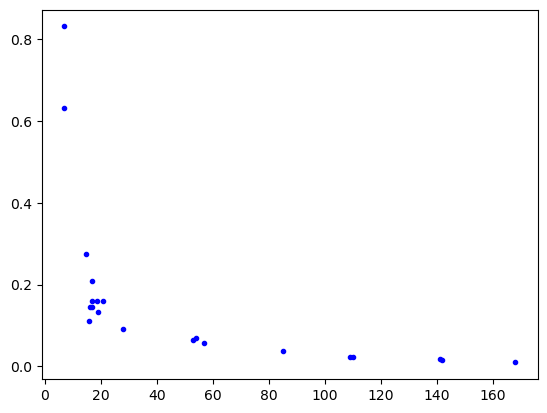

In [13]:
t = np.array([7.0, 7.0, 14.8, 16.0, 16.9, 17.0, 18.8, 19.0, 20.9, 15.8, 16.8, 28.0, 53.0, 54.0, 57.0, 85.0, 109.0, 110.0, 141.0, 142.0, 168.0])
L = np.array([0.6310, 0.8318, 0.2754, 0.1445, 0.2089, 0.1585, 0.1585, 0.1318, 0.1585, 0.1096, 0.1445, 0.09120, 0.06310, 0.06918, 0.05754, 0.03631, 0.02291, 0.02291, 0.01738, 0.01585, 0.009120])
plt.plot(t, L, ".", color = 'blue')

Методом нелинейных квадратов ищем неизвестные параметры. Строим график

(0.15975280972450118, 3.5662624699600376, 58.51405929626225, 3.890484999234576)

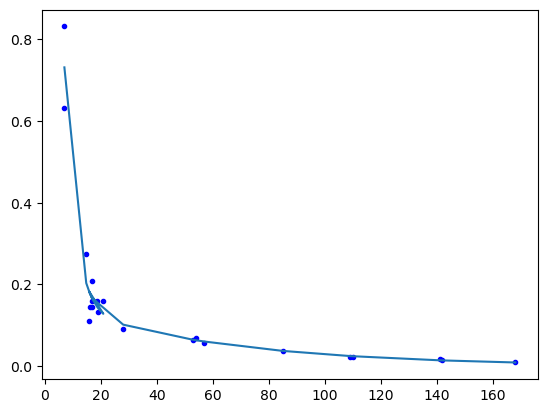

In [44]:
def Lt(t, C1, C2, a1, a2):
    return C1*math.e**(-t/a1) + C2*math.e**(-t/a2)

res, _ = optimize.curve_fit(Lt, t,  L)
C1, C2, a1, a2 = res

plt.plot(t, L, ".", color = 'blue')
plt.plot(t, Lt(t, C1, C2, a1, a2))

C1, C2, a1, a2

Построим еще несколько графиков с различными начальными значениями. Сначала создадим рандомные значения для C1, a1, C2, a2

In [240]:
t2 = np.array([np.random.randint(1, 180) for i in range(30)])
t2.sort()
L2 = np.array([np.random.rand() for i in range(30)])
L2.sort()
L2 = L2[::-1]

def Lt2(t2, C1, C2, a1, a2):
    return C1*math.e**(-t2/a1) + C2*math.e**(-t2/a2)

res, _ = optimize.curve_fit(Lt2, t2, L2)

C1, C2, a1, a2 = res
res

array([-1.40786929,  1.89054803,  7.93928273, 35.96748622])

Строим график

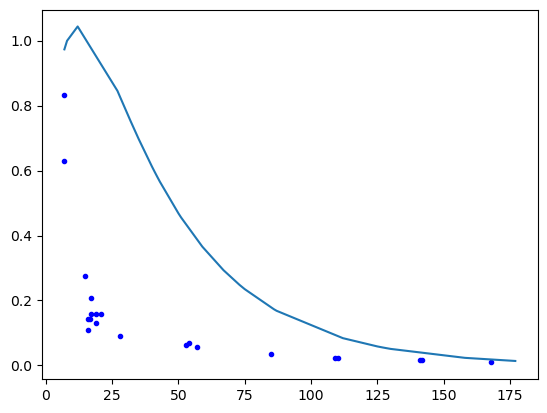

In [241]:
y = Lt2(t2, C1, C2, a1, a2)

plt.plot(t, L, ".", color = 'blue')
plt.plot(t2, y)

Суммарная результирующая ошибка

In [246]:
y = Lt(t, C1, C2, a1, a2)
err = np.sqrt(np.sum(Lt(t, C1, C2, a1, a2)/len(t))**2)
err

0.035462711252388666

Аппроксимация одной экспонентой

array([8.07830623, 5.74676198])

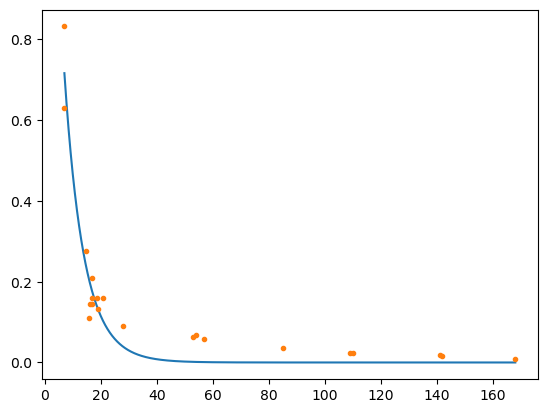

In [243]:
def Lte(t, a1, a2):
    return math.e**(-t/a1) + math.e**(-t/a2)
res, _ = optimize.curve_fit(Lte, t, L)

a1,a2 = res

x = np.linspace(np.min(t), np.max(t), 10000)
y = Lte(x, a1, a2)

plt.plot(x, y)
plt.plot(t, L, ".")

res

In [245]:
y = Lte(t, a1, a2)
err = np.sqrt(np.sum(Lte(t, a1, a2)/len(t))**2) # результирующая ошибка с одной экспонентой
err

0.14353484645996561

Суммарная результирующая ошибка при использовании двух экспонент меньше, чем при аппроксимации одной экспонентой. Следовательно, для наилучшей точности следует брать наибольшее количество входных параметров, а также сравнивать результаты при различных начальных значениях.